In [2]:
import numpy as np
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import RegexpTokenizer
import re


nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
dataset = pd.read_csv("/content/data.csv")


display(dataset.head())
display(dataset.describe(include='all'))

FileNotFoundError: [Errno 2] No such file or directory: '/content/data.csv'

**Data Preprocessing and Visualization**


In [9]:
print("Number of null values in each column:")
print(dataset.isnull().sum())

# Drop rows with null values in specific columns
dataset = dataset.dropna(subset=['Tweets', 'Feeling'])

Number of null values in each column:
Sl no         0
Tweets        0
Search key    0
Feeling       0
length        0
dtype: int64


In [32]:
print(X.shape)  # Should return the number of samples and features
print(y.shape)  # Should return the number of samples


(10017, 40745)
(10017,)


In [25]:
# Check label distribution in the dataset
print(dataset['Feeling'].value_counts())


Feeling
3    3928
4    2849
0    1341
2     863
1     637
5     399
Name: count, dtype: int64


In [43]:
# Remove URLs, mentions, hashtags, and special characters
def preprocess_text(text):
    # Remove RT, mentions, hashtags, and URLs
    text = re.sub(r'RT @[\w_]+:', '', text)  # Remove 'RT @user:' part
    text = re.sub(r'@[\w_]+', '', text)  # Remove mentions (@username)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags (#hashtag)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Keep only alphabets and spaces
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing spaces
    return text

# Apply preprocessing to each tweet
dataset['cleaned_Tweets'] = dataset['Tweets'].apply(preprocess_text)


In [23]:
# Add a new column for tweet length
dataset['length'] = dataset['Tweets'].apply(len)

# Display the first few rows after adding the length column
display(dataset.head())




,Sl no,Tweets,Search key,Feeling,length
0,1,"#1: @fe ed ""RT @MirayaDizon1: Time is ticking...",happy moments,3,152
1,2,"#2: @蓮花 &はすか ed ""RT @ninjaryugo: ＃コナモンの日 だそうで...",happy moments,3,107
2,3,"#3: @Ris ♡ ed ""Happy birthday to one smokin h...",happy moments,3,296
3,4,"#4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...",happy moments,3,241
4,5,"#5: @Madhurima wth u vc♥ ed ""Good morning dea...",happy moments,3,254


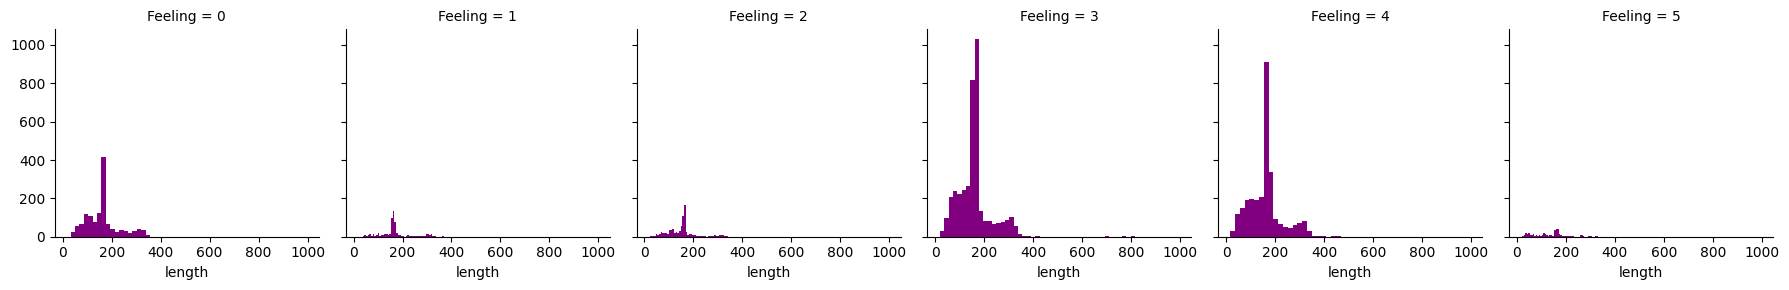

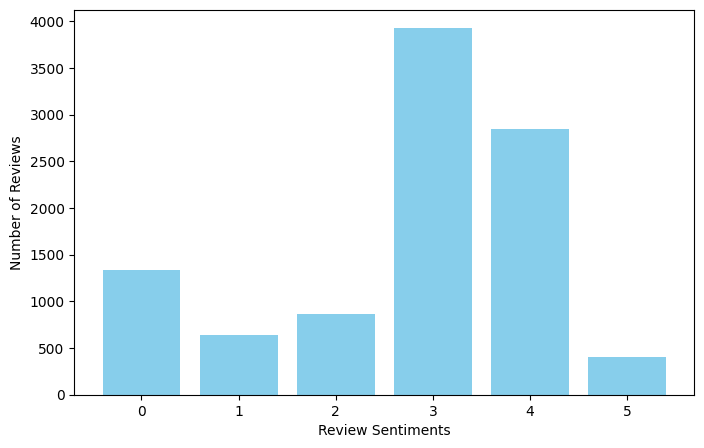

In [24]:
# Plot the distribution of tweet lengths for each sentiment
graph = sns.FacetGrid(data=dataset, col='Feeling')
graph.map(plt.hist, 'length', bins=50, color='Purple')

# Plot the count of each sentiment category
Sentiment_val = dataset.groupby('Feeling').count()
plt.figure(figsize=(8, 5))
plt.bar(Sentiment_val.index.values, Sentiment_val['Tweets'], color='skyblue')
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Reviews')
plt.show()

**Text Vectorization**

In [57]:
print(label_encoder.classes_)

[0 1 2 3 4 5]


In [44]:
# Tokenize text using RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')  # Tokenizer for alphanumeric words

# Initialize CountVectorizer and TfidfVectorizer
cv = CountVectorizer(
    lowercase=True,
    stop_words='english',
    ngram_range=(1, 1),
    tokenizer=token.tokenize,
    token_pattern=None  # Avoid default tokenization
)

tf = TfidfVectorizer()

# Apply CountVectorizer and TF-IDF
text_counts = cv.fit_transform(dataset['cleaned_Tweets'])
text_tf = tf.fit_transform(dataset['cleaned_Tweets'])


In [45]:
# Encode the emotions (Feelings) to numeric labels
label_encoder = LabelEncoder()
dataset['Feeling'] = label_encoder.fit_transform(dataset['Feeling'])

# Check the distribution of labels
print(dataset['Feeling'].value_counts())


Feeling
3    3928
4    2849
0    1341
2     863
1     637
5     399
Name: count, dtype: int64


In [46]:
# Define features (X) and target (y)
X = text_tf  # TF-IDF transformed text
y = dataset['Feeling']  # Emotion labels

# Split the data into training and test sets (70% train, 30% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Check split sizes
print(f"Training set size: {x_train.shape[0]}, Test set size: {x_test.shape[0]}")


Training set size: 7011, Test set size: 3006


**Model Training and Evaluation**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)



RandomForestClassifier()

In [36]:
# Predict on the test set
pred_rf = rf.predict(x_test)

# Evaluation Metrics
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, pred_rf))

score = round(accuracy_score(y_test, pred_rf) * 100, 2)
print("\nAccuracy Score:", score)

print("\nClassification Report:")
print(classification_report(y_test, pred_rf))

Confusion Matrix for Decision Tree:
[[ 310    0    1   53   31    0]
 [   0  166    0   31    1    0]
 [   0    0  190   58    2    0]
 [   1    0    2 1213    4    2]
 [   3    0    2  133  692    0]
 [   0    0    0   22    0   89]]

Accuracy Score: 88.49

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87       395
           1       1.00      0.84      0.91       198
           2       0.97      0.76      0.85       250
           3       0.80      0.99      0.89      1222
           4       0.95      0.83      0.89       830
           5       0.98      0.80      0.88       111

    accuracy                           0.88      3006
   macro avg       0.95      0.84      0.88      3006
weighted avg       0.90      0.88      0.88      3006



In [37]:
from sklearn.preprocessing import LabelEncoder

# Fit the LabelEncoder on all labels in the dataset
label_encoder = LabelEncoder()
dataset['Feeling'] = label_encoder.fit_transform(dataset['Feeling'])

# Redefine `y` to use the encoded target variable
y = dataset['Feeling']





In [61]:
def predict_emotion(text, model, tfidf_vectorizer, label_encoder):
    # Preprocess and transform the input text using the fitted TF-IDF vectorizer
    text_cleaned = preprocess_text(text)  # Apply preprocessing
    text_transformed = tfidf_vectorizer.transform([text_cleaned])

    # Predict the emotion using the trained model
    predicted_label = model.predict(text_transformed)

    # Decode the numeric label back to the original emotion label
    emotion = label_encoder.inverse_transform(predicted_label)
    return emotion[0]  # Return the emotion name

In [1]:
# Predict the emotion for a sample input text
input_text = "Happy birthday to mam"
predicted_emotion = predict_emotion(input_text, rf, tf, label_encoder)
print(f"The predicted emotion for the input text is: {predicted_emotion}")

NameError: name 'predict_emotion' is not defined